## LETKF
- 計算量は多くなるが並列計算できる．

### アルゴリズム
$ \tilde{P^a} = [(N-1)I/\rho + dY^T R^{-1} dY]^{-1} $

$ T = \tilde{P^a} dY^T R^{-1}(y^o - \overline{dY^f}) + [(N-1) \tilde{P^a}]^{1/2} $

$ X^a = x^f + dX^f T$

### localiztion
- 各点で分けて解析を行う．
- その際に

### Question
- 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# モジュールの読み込み
import sys
sys.path.append('./module')
from utils import make_lorenz96, rk4, error_series_kf, plot_error_KF, estimate_error_with_params
from localization import plot_gaspari_cohn
from kalman_filters import LocalEnsembleTransformKalmanFilter as LETKF

In [3]:
# Lorenz96の設定
J = 40
F = 8
lorenz = make_lorenz96(F)

# 同化step
# 時間発展は0.01ごとに行う
dt = 0.05

# モデルの遷移関数(非線形)
# 0.01ずつ時間発展させる
# dtは同化step
def M(x, dt):
    for i in range(int(dt/0.01)):
        x = rk4(0, x, 0.01, lorenz)
    return x

# 単位行列
I = np.identity(J)

# 観測
H = I

# モデル誤差共分散, 最初は完全モデルを仮定
Q = np.zeros((J, J))

# 観測誤差共分散, 後で定数倍の変化をさせる.
R = I

# 観測値と真値
y = np.load('data/obs_atr.npy')
true = np.load('data/true_atr.npy')

# KFの初期値
np.random.seed(0)
x_0 = true[np.random.randint(len(true)-1)]
P_0 = 25*I

## Gaspari Cohn
- $ 2c $で$0$になる．
- 対応するgassianのスケールは$L = c(0.3)^{1/2}$(標準偏差$ L = c(0.3)^2 $のgaussianに対応．)

### gaspari cohn vs gaussian
パラメータの対応関係．以下の対応がある．

$ G_c(x, c) \leftrightarrow \exp(- \frac{x^2}{2L^2}) $

ただし，$ L = c(0.3)^{1/2} $

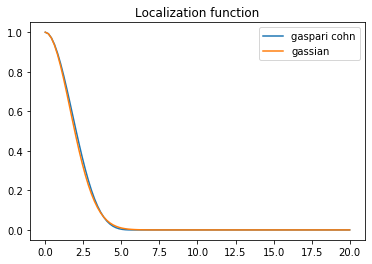

In [44]:
c = c
L = c*(0.3)**(1/2)
plot_gaspari_cohn(c)
x_arr = np.linspace(0, 20, 100)
y_func = [np.exp(-x**2/(2*L**2)) for x in x_arr]
plt.plot(x_arr, y_func, label='gassian')
plt.legend()

## parameter推定
推定20min程度 -> 結果: 21min46s

In [41]:
# %%time
# m=8
# spin_up = 150
# duration = 150

# num_alpha = 11
# num_c = 10
# params_alpha = np.linspace(1.0, 1.5, num=num_alpha)
# params_c = np.arange(num_c) + 1
# errors = np.zeros((num_alpha, num_c))

# for i in range(num_alpha):
#     alpha = params_alpha[i]
#     for j in range(num_c):
#         c = params_c[j]
#         letkf = LETKF(M, H, Q, R, y[:spin_up+duration], x_0, P_0, m=m, alpha=alpha, c=c)
#         letkf.forward_estimation()
#         error = error_series_kf(true, letkf.x, time_index=np.arange(duration)+spin_up).mean()
#         errors[i,j] = error
#         print('complete: alpha: {}, c: {}, error: {}'.format(alpha, c, error))
#     print('=======================')
# df = pd.DataFrame(errors, index=params_alpha, columns=params_c)
# df.to_csv('data/letkf/letkf_alpha_c_rough.csv')

Text(42.0, 0.5, 'alpha')

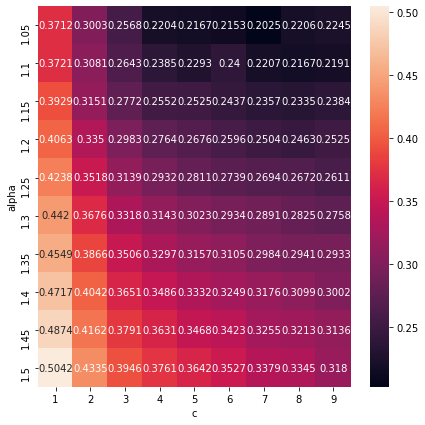

In [25]:
df = pd.read_csv('data/letkf/letkf_alpha_c_rough.csv', index_col=0, header=0)
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(df.iloc[1:, :9], annot=True, fmt='.4g')
ax.set_xlabel('c')
ax.set_ylabel('alpha')

### 細かく調整
実行時間: 1h 40min 28s

In [4]:
# # %%time
# m=8
# spin_up = 200
# duration = len(true) - spin_up

# num_alpha = 11
# num_c = 11
# params_alpha = np.linspace(1.05-0.05, 1.05+0.05, num=num_alpha)
# params_c = np.arange(num_c)*(2/5) + 6
# errors = np.zeros((num_alpha, num_c))

# for i in range(num_alpha):
#     alpha = params_alpha[i]
#     for j in range(num_c):
#         c = params_c[j]
#         letkf = LETKF(M, H, Q, R, y[:spin_up+duration], x_0, P_0, m=m, alpha=alpha, c=c)
#         letkf.forward_estimation()
#         error = error_series_kf(true, letkf.x, time_index=np.arange(duration)+spin_up).mean()
#         errors[i,j] = error
#         print('complete: alpha: {}, c: {}, error: {}'.format(alpha, c, error))
#     print('=======================')
# df = pd.DataFrame(errors, index=params_alpha, columns=params_c)
# df.to_csv('data/letkf/letkf_alpha_c_detail.csv')

complete: alpha: 1.0, c: 6.0, error: 2.499304214331703
complete: alpha: 1.0, c: 6.4, error: 2.7021218102087072
complete: alpha: 1.0, c: 6.8, error: 3.7140541820978297
complete: alpha: 1.0, c: 7.2, error: 3.7766673085106484
complete: alpha: 1.0, c: 7.6, error: 3.6067107499367226
complete: alpha: 1.0, c: 8.0, error: 3.8879654453336117
complete: alpha: 1.0, c: 8.4, error: 3.776763743894956
complete: alpha: 1.0, c: 8.8, error: 3.737868434132983
complete: alpha: 1.0, c: 9.2, error: 3.8044488419319085
complete: alpha: 1.0, c: 9.6, error: 4.170856864294661
complete: alpha: 1.0, c: 10.0, error: 3.8007276181629903
complete: alpha: 1.01, c: 6.0, error: 0.23291298796983564
complete: alpha: 1.01, c: 6.4, error: 0.2191995837961539
complete: alpha: 1.01, c: 6.8, error: 1.3307709078288619
complete: alpha: 1.01, c: 7.2, error: 2.9608246593733356
complete: alpha: 1.01, c: 7.6, error: 3.4781966449821415
complete: alpha: 1.01, c: 8.0, error: 3.700222023670594
complete: alpha: 1.01, c: 8.4, error: 3.60328

Text(69.0, 0.5, 'alpha')

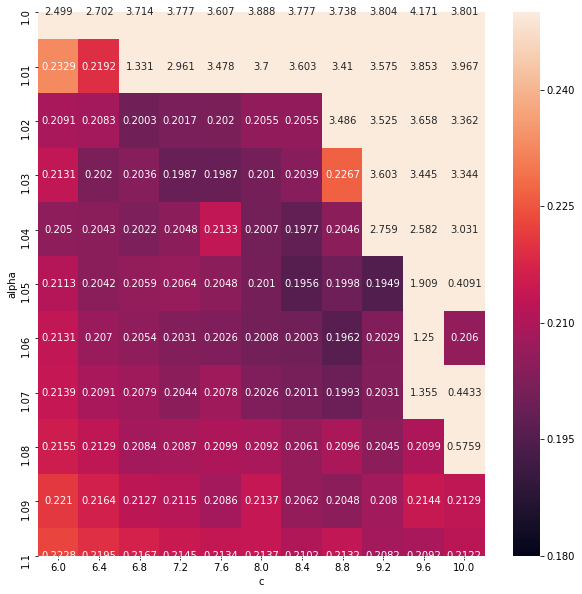

In [13]:
df = pd.read_csv('data/letkf/letkf_alpha_c_detail.csv', index_col=0, header=0)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.iloc[:, :], annot=True, fmt='.4g', vmax=0.25, vmin=0.18)
ax.set_xlabel('c')
ax.set_ylabel('alpha')

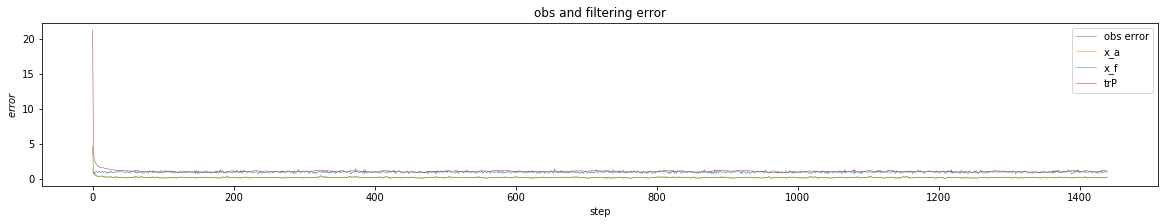

9.15
CPU times: user 12min 18s, sys: 4.94 s, total: 12min 23s
Wall time: 1min 33s


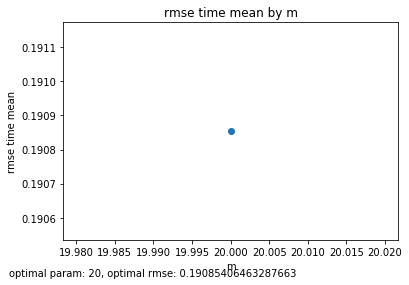

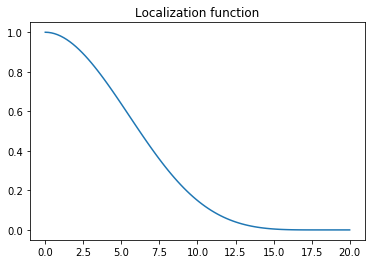

In [14]:
%%time
m = 20
alpha = 1.05
# sigma = 4.5
# c = sigma*(0.3**(-1/2))
c = 9.15
letkf = LETKF(M, H, Q, R, y[:], x_0, P_0, m=m, alpha=alpha, c=c, localization='', addaptive=False)
letkf.forward_estimation()
plot_error_KF(true, y, [letkf.x, letkf.x_f], trPs=[letkf.trP], legends=['x_a', 'x_f'])
_, _, rmse = estimate_error_with_params(true, [letkf.x], [m], 'm')
df = pd.read_csv('data/kf_time_rmse_comparision.csv', index_col=0, header=0)
plot_gaspari_cohn(c)
print(c)

# 記録更新
df = pd.read_csv('data/kf_time_rmse_comparision.csv', index_col=0, header=0)
if df['LETKF8']['rmse'] > rmse:
    df['LETKF8']['rmse'] = rmse
    print('updated!')
    df.to_csv('data/kf_time_rmse_comparision.csv')

In [15]:
df

,ExKF,3DVar,PO40,SRF20,SRF40,SRF50,LETKF8
time,49.6000,1.4900,51.9000,23.9000,53.2000,122.0000,88.000000
rmse,0.2018,0.3871,0.2705,0.2099,0.1636,0.1679,0.190426


In [41]:
# np.save('data/letkf/letkf_optimal.npy', [letkf.x, letkf.trP])

In [ ]:
# # %%time
# m=8
# spin_up = 200
# duration = len(true) - spin_up

# num_alpha = 11
# num_c = 11
# params_alpha = np.linspace(1.05-0.05, 1.05+0.05, num=num_alpha)
# params_c = np.arange(num_c)*(2/5) + 6
# errors = np.zeros((num_alpha, num_c))

# for i in range(num_alpha):
#     alpha = params_alpha[i]
#     for j in range(num_c):
#         c = params_c[j]
#         letkf = LETKF(M, H, Q, R, y[:spin_up+duration], x_0, P_0, m=m, alpha=alpha, c=c)
#         letkf.forward_estimation()
#         error = error_series_kf(true, letkf.x, time_index=np.arange(duration)+spin_up).mean()
#         errors[i,j] = error
#         print('complete: alpha: {}, c: {}, error: {}'.format(alpha, c, error))
#     print('=======================')
# df = pd.DataFrame(errors, index=params_alpha, columns=params_c)
# df.to_csv('data/letkf/letkf_alpha_c_detail.csv')